# 1. Net

### Train loss curve
![Figure_1 net.png](<attachment:Figure_1 net.png>)
### Confusion Matrix
|        | Plane | Car  | Bird  | Cat  | Deer  | Dog  | Frog  | Horse | Ship  | Truck |
|--------|-------|------|-------|------|-------|------|-------|-------|-------|-------|
| **Plane** | 72.60 | 3.00  | 6.00  | 1.40 | 1.30  | 0.20 | 2.10  | 0.40  | 6.40  | 6.60  |
| **Car**   | 5.20  | 73.30 | 1.40  | 0.80 | 0.20  | 0.00 | 1.00  | 0.20  | 3.00  | 14.90 |
| **Bird**  | 9.80  | 1.40  | 47.30 | 11.30| 8.50  | 2.00 | 11.20 | 2.70  | 2.40  | 3.40  |
| **Cat**   | 4.40  | 1.70  | 10.10 | 48.40| 5.40  | 2.20 | 15.10 | 2.80  | 2.70  | 7.20  |
| **Deer**  | 7.50  | 1.30  | 14.60 | 9.80 | 39.30 | 1.00 | 14.40 | 9.20  | 0.80  | 2.10  |
| **Dog**   | 3.20  | 0.90  | 13.00 | 47.50| 5.60  | 12.90| 6.80  | 4.60  | 2.30  | 3.20  |
| **Frog**  | 1.20  | 1.90  | 5.80  | 8.40 | 3.80  | 0.10 | 72.70 | 0.70  | 0.90  | 4.50  |
| **Horse** | 5.80  | 0.60  | 4.80  | 12.90| 6.30  | 2.60 | 2.20  | 55.60 | 1.30  | 7.90  |
| **Ship**  | 20.60 | 6.10  | 2.20  | 2.20 | 0.30  | 0.00 | 0.60  | 0.50  | 60.10 | 7.40  |
| **Truck** | 4.70  | 16.80 | 1.00  | 2.30 | 0.40  | 0.10 | 1.70  | 1.00  | 3.50  | 68.50 |

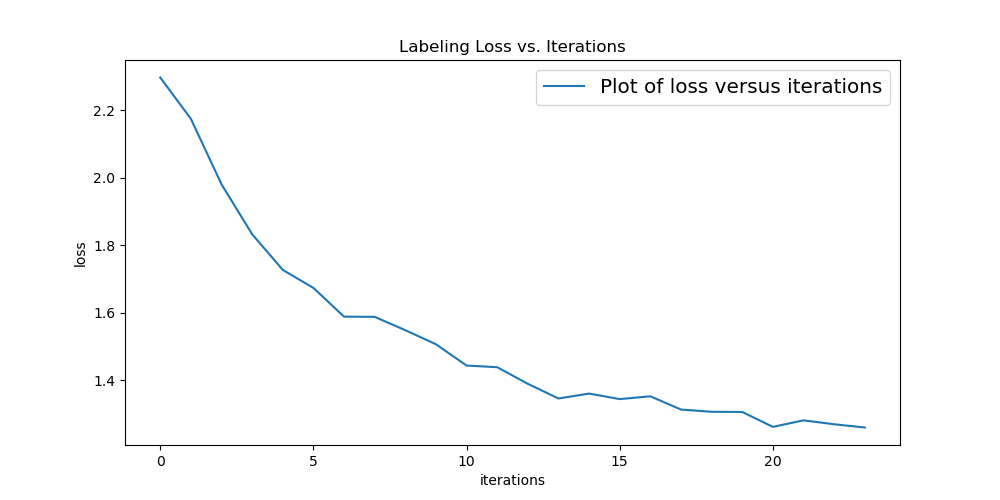

# 2. Net2

### Train loss curve
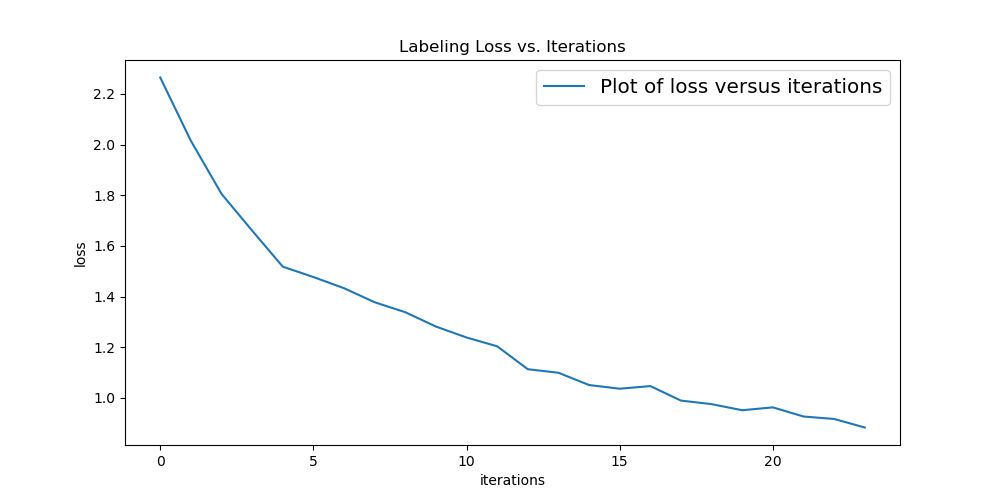

### Confusion Matrix
|        | Plane | Car  | Bird  | Cat  | Deer  | Dog  | Frog  | Horse | Ship  | Truck |
|--------|-------|------|-------|------|-------|------|-------|-------|-------|-------|
| **Plane** | 72.40 | 2.10  | 5.60  | 1.70 | 2.40  | 0.20 | 1.20  | 1.50  | 6.60  | 6.30  |
| **Car**   | 0.90  | 78.10 | 0.80  | 0.40 | 0.40  | 0.30 | 0.60  | 0.10  | 1.50  | 16.90 |
| **Bird**  | 6.10  | 0.70  | 53.10 | 4.70 | 12.40 | 6.10 | 8.40  | 3.70  | 2.10  | 2.70  |
| **Cat**   | 1.70  | 0.80  | 6.00  | 46.60| 8.30  | 15.80| 8.60  | 4.90  | 2.80  | 4.50  |
| **Deer**  | 1.50  | 0.20  | 5.60  | 3.60 | 67.40 | 2.80 | 8.60  | 7.80  | 2.00  | 0.50  |
| **Dog**   | 1.10  | 0.50  | 5.40  | 16.20| 6.20  | 58.30| 2.50  | 5.60  | 1.80  | 2.40  |
| **Frog**  | 0.30  | 0.90  | 3.80  | 4.90 | 2.60  | 1.30 | 82.10 | 0.70  | 0.80  | 2.60  |
| **Horse** | 0.90  | 0.40  | 2.00  | 3.50 | 6.10  | 6.20 | 0.70  | 77.20 | 0.60  | 2.40  |
| **Ship**  | 5.40  | 4.10  | 0.90  | 0.60 | 0.80  | 0.50 | 0.40  | 0.60  | 83.00 | 3.70  |
| **Truck** | 1.90  | 5.30  | 0.30  | 0.70 | 0.30  | 0.30 | 0.30  | 1.60  | 3.30  | 86.00 |


# 3. Net3

In [6]:
import os
import sys
current_dir = os.getcwd()
print("current_dir : %s" % current_dir)
goal = os.path.join(os.path.dirname(current_dir), "HW4\DLStudio-2.5.1")
sys.path.append(goal)
print("Navigated to:", goal)
from DLStudio import *

current_dir : d:\MS Purdue\1.5\ECE60146\HW5
Navigated to: d:\MS Purdue\1.5\ECE60146\HW4\DLStudio-2.5.1


100.0%


Extracting ./data/CIFAR-10/cifar-10-python.tar.gz to ./data/CIFAR-10/
Files already downloaded and verified


The number of learnable parameters in the model: 62006


Starting training loop...



[epoch:1/2  iter=1000  elapsed_time=   12 secs]   Ground Truth:            cat        dog      truck      horse
[epoch:1/2  iter=1000  elapsed_time=   12 secs]   Predicted Labels:       frog      horse        car      horse
[epoch:1/2  iter=1000  elapsed_time=   12 secs]   Loss: 2.298


[epoch:1/2  iter=2000  elapsed_time=   14 secs]   Ground Truth:           deer        dog       ship      plane
[epoch:1/2  iter=2000  elapsed_time=   14 secs]   Predicted Labels:        cat        cat      plane      plane
[epoch:1/2  iter=2000  elapsed_time=   14 secs]   Loss: 2.127


[epoch:1/2  iter=3000  elapsed_time=   17 secs]   Ground Truth:           frog      truck        car      horse
[epoch:1/2  iter=3000  elapsed_time=   17 secs]   Predicted Labels:        car       ship      plane        car
[epo

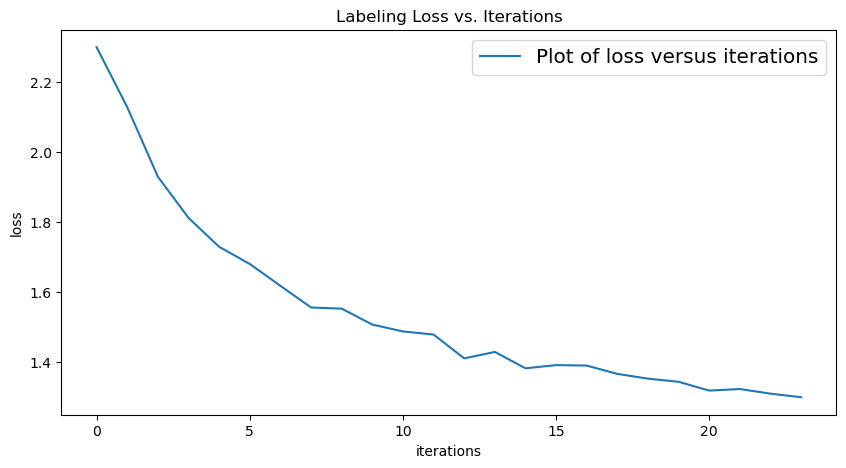

d:\MS Purdue\1.5\ECE60146\HW4\DLStudio-2.5.1\DLStudio\DLStudio.py:2964: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(self.path_saved_model))




[i=1000:] Ground Truth:      frog  bird  bird truck
[i=1000:] Predicted Labels:   car   cat   cat   car


[i=2000:] Ground Truth:     horse   car  bird  frog
[i=2000:] Predicted Labels: horse   car   car  deer
Prediction accuracy for plane : 40 %
Prediction accuracy for   car : 74 %
Prediction accuracy for  bird : 26 %
Prediction accuracy for   cat : 40 %
Prediction accuracy for  deer : 46 %
Prediction accuracy for   dog : 42 %
Prediction accuracy for  frog : 69 %
Prediction accuracy for horse : 61 %
Prediction accuracy for  ship : 82 %
Prediction accuracy for truck : 58 %



Overall accuracy of the network on the 10000 test images: 54 %


Displaying the confusion matrix:

           plane    car   bird    cat   deer    dog   frog  horse   ship  truck

 plane:    40.70   6.00   5.80   2.80   1.80   0.40   2.10   0.90  34.30   5.20
   car:     1.10  74.80   0.30   0.80   0.50   0.30   0.80   0.20  11.20  10.00
  bird:     6.10   2.40  26.50  14.00  21.80   8.00   9.60   3.30   6.10   

In [8]:
# This code is mainly borrowed from HW5.pdf
import random
import numpy as np
import torch
import os

# Set random seed for reproducibility
seed = 0
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmarks = False
os.environ['PYTHONHASHSEED'] = str(seed)

import torch.nn as nn
import torch.nn.functional as F

# Initialize DLStudio

dls = DLStudio(
    dataroot="./data/CIFAR-10/",
    image_size=[32, 32],
    path_saved_model="./saved_model",
    momentum=0.9,
    learning_rate=1e-3,
    epochs=2,
    batch_size=4,
    classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'),
    use_gpu=True # Set to False by default
)

# Define Custom Experiments With CIFAR class
class CustomExperimentsWithCIFAR(DLStudio.ExperimentsWithCIFAR):
    # Define a new model Net3
    class Net3(nn.Module):
        def __init__(self):
            super(CustomExperimentsWithCIFAR.Net3, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
            self.fc1 = nn.Linear(128 * 4 * 4, 256)
            self.fc2 = nn.Linear(256, 10)
            self.pool = nn.MaxPool2d(2, 2)
            self.dropout = nn.Dropout(0.5)

        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = self.pool(F.relu(self.conv3(x)))
            x = x.view(-1, 128 * 4 * 4)
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            x = self.fc2(x)
            return x

# Use the new class
exp_cifar = CustomExperimentsWithCIFAR(dl_studio=dls)
exp_cifar.load_cifar_10_dataset()

# Instantiate the new model
model = exp_cifar.Net()
# model = exp_cifar.Net2()
# model = exp_cifar.Net3()

# Display network properties
number_of_learnable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\n\nThe number of learnable parameters in the model: %d" % number_of_learnable_params)

# Run training and testing
exp_cifar.run_code_for_training(model, display_images=False)
exp_cifar.run_code_for_testing(model, display_images=False)


### Creating CustomExperimentsCIFAR and Net3
### Train loss curve

### Confusion Matrix

# 4. Overall accuracy of 3 models
|        | Accuracy |
|--------|-------|
| **Net** | 55% |
| **Net2** | 70% |  
| **Net3** | % | 

net1: Overall accuracy of the network on the 10000 test images: 55 %
net2: Overall accuracy of the network on the 10000 test images: 70 %

# 5. Per class accuracy of 3 models
|        | **Net**  | **Net2** | **Net3** |
|--------|---------|---------|---------|
| **Plane** | 72.60  | 72.40  |         |
| **Car**   | 73.30  | 78.10  |         |
| **Bird**  | 47.30  | 53.10  |         |
| **Cat**   | 48.40  | 46.60  |         |
| **Deer**  | 39.30  | 67.40  |         |
| **Dog**   | 12.90  | 58.30  |         |
| **Frog**  | 72.70  | 82.10  |         |
| **Horse** | 55.60  | 77.20  |         |
| **Ship**  | 60.10  | 83.00  |         |
| **Truck** | 68.50  | 86.00  |         |


# 6. Observations